In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd 
import numpy as np 
import os
import re

In [2]:
df= pd.read_excel("fine.xlsx")
df.head()

,LABEL,cleaned
0,EP,You are very beautiful
1,EP,Nice
2,EP,Nice video jitu bhai
3,EP,Super
4,EP,Supar comedy


In [3]:
df.shape

(6341, 2)

In [4]:
df.columns = ['LABEL','COMMENT']

In [5]:
df['LABEL_id'] = df['LABEL'].factorize()[0]

In [6]:
cat_id_df = df[["LABEL","LABEL_id"]].drop_duplicates().sort_values('LABEL_id')

In [7]:
cat_to_id = dict(cat_id_df[['LABEL_id','LABEL']].values)

In [8]:
df.head()

,LABEL,COMMENT,LABEL_id
0,EP,You are very beautiful,0
1,EP,Nice,0
2,EP,Nice video jitu bhai,0
3,EP,Super,0
4,EP,Supar comedy,0


In [9]:
fig = plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

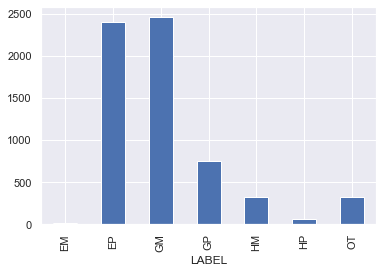

In [10]:
df.groupby('LABEL').COMMENT.count().plot.bar(ylim=0)

In [11]:
Y = df['LABEL'].values
X = df['COMMENT'].values

In [12]:
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [22]:
# Make Machine Learning Pipeline with TfidfVectorizer and MultinomialNB
from sklearn.ensemble import RandomForestClassifier
tfidf_vect = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
model = RandomForestClassifier()
text_clf = Pipeline([('tfidf', tfidf_vect),
                    ('clf', model),])

In [23]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(2, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [24]:
predictions = text_clf.predict(X_test)
predictions

array(['EP', 'EP', 'OT', ..., 'GM', 'EP', 'GM'], dtype=object)

In [25]:
# Measure accuracy
accuracy_score(y_test,predictions)

0.8786127167630058

In [26]:
# alternate train and test set through cross validation to yield a more trustworthy accuracy
scores = cross_val_score(text_clf, X, Y, cv=5)
print("Mean cross-validation accuracy: " + str(scores.mean()))

Mean cross-validation accuracy: 0.860115021390946


In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          EM       0.00      0.00      0.00         5
          EP       0.92      0.91      0.92       710
          GM       0.84      0.92      0.87       758
          GP       0.97      0.98      0.97       233
          HM       0.80      0.04      0.08        94
          HP       0.67      0.75      0.71        16
          OT       0.78      1.00      0.88        87

    accuracy                           0.88      1903
   macro avg       0.71      0.66      0.63      1903
weighted avg       0.88      0.88      0.86      1903



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'LI Confusion Matrix of RF')

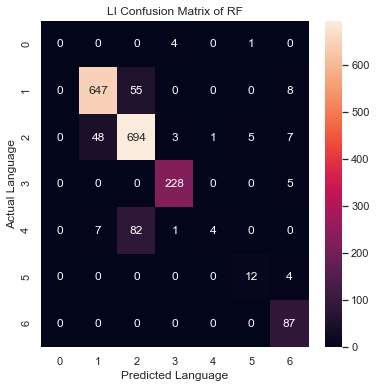

In [28]:
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, predictions)

ax = sns.heatmap(cm, annot = True, fmt = "d")

ax.set_xlabel('Predicted Language')
ax.set_ylabel('Actual Language')
ax.set_title('LI Confusion Matrix of RF')

In [29]:
txt= ['congresh ni ak दीधी',
      'maru name kazi zuber chhe',
      'nice',
      'mera name kya he',
      'ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜']

pred = text_clf.predict(txt)
for i in pred :
        print(i)

GM
GM
EP
GM
OT
